Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the Data

df = pd.read_csv("breast-cancer.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

No missing Values

In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
X=df.drop("diagnosis",axis=1)
Y= df["diagnosis"]

In [6]:
#scale all features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
#to reduce the number of dimension we will use PCA

from sklearn.decomposition import PCA
pca= PCA(n_components=10)

In [8]:
components=pca.fit_transform(X)

In [9]:
components

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840346,
        -0.15712634, -0.87738692],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098549,
        -0.7118972 ,  1.10698481],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737389,
         0.02406315,  0.45427699],
       ...,
       [ 1.25617928, -1.90229671,  0.56273052, ...,  0.34188563,
         0.39392175,  0.5208722 ],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023593,
        -0.54204127, -0.08928637],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635474,
         0.37409643, -0.04771819]])

In [10]:
var = pca.explained_variance_ratio_
var

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [11]:
#cumulative variance
var1 = np.cumsum(var*100)
var1

array([44.27202561, 63.24320765, 72.63637091, 79.23850582, 84.73427432,
       88.75879636, 91.00953007, 92.59825387, 93.98790324, 95.15688143])

In [12]:
pcs = pd.DataFrame(components[:,0:7],columns = ["pc1","pc2","pc3","pc4","pc5","pc6","pc7"])

In [13]:
X= pcs

In [14]:
m=[]
s=[]

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Logistic Regression")
s.append(results.mean())

0.9701127819548871


In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini',max_depth=3)

results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("DecisionTreeClassifier")
s.append(results.mean())

0.9190789473684211


In [18]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Naive Bayes")
s.append(results.mean())

0.924436090225564


In [19]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

results = cross_val_score(model, X, Y, cv=10)

print(results.mean())

m.append("KNN")
s.append(results.mean())

0.9594924812030076


In [20]:
#support vector machine
from sklearn.svm import SVC

model = SVC()
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("SVM")
s.append(results.mean())


0.9683583959899748


In [21]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Adaboost")
s.append(results.mean())

0.9419172932330826


In [22]:
# Bagged Decision Trees for Classification

from sklearn.ensemble import BaggingClassifier

sv = SVC()
model = BaggingClassifier(base_estimator=sv, n_estimators=100)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Bagging classifier")
s.append(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.9665726817042606


In [23]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, max_features=3)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Random Forest")
s.append(results.mean())

0.9507518796992482


In [24]:
# Voting Ensemble for Classification (logistic, SVM, DT)

from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=10)
print(results.mean())


m.append("Voting Classifier")
s.append(results.mean())

0.9736215538847116


In [25]:
models = {
    "Model":m,
    "Scores":s
}

In [26]:
models_df = pd.DataFrame(models)
models_df

,Model,Scores
0,Logistic Regression,0.970113
1,DecisionTreeClassifier,0.919079
2,Naive Bayes,0.924436
3,KNN,0.959492
4,SVM,0.968358
5,Adaboost,0.941917
6,Bagging classifier,0.966573
7,Random Forest,0.950752
8,Voting Classifier,0.973622


<Axes: xlabel='Scores', ylabel='Model'>

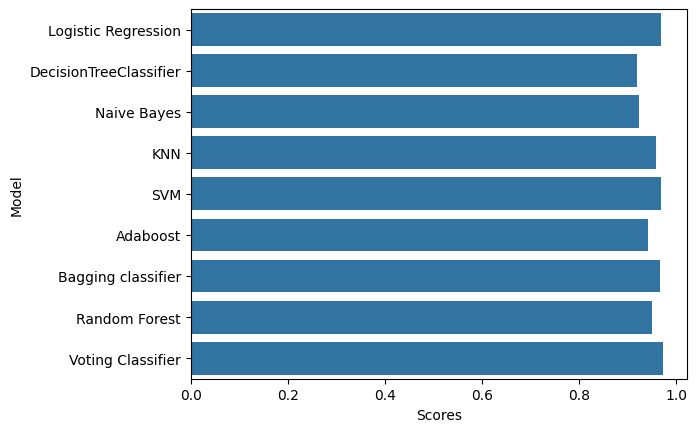

In [27]:
sns.barplot(x= "Scores",y="Model",data=models_df,orient="h")